In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('traffic.csv')
df.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [4]:
df.columns

Index(['DateTime', 'Junction', 'Vehicles', 'ID'], dtype='object')

In [42]:
df.shape

(48120, 5)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  48120 non-null  datetime64[ns]
 1   Junction  48120 non-null  int64         
 2   Vehicles  48120 non-null  int64         
 3   ID        48120 non-null  int64         
 4   Hours     48120 non-null  int32         
dtypes: datetime64[ns](1), int32(1), int64(3)
memory usage: 1.7 MB


In [44]:
df.describe()

,DateTime,Junction,Vehicles,ID,Hours
count,48120,48120.000000,48120.000000,4.812000e+04,48120.000000
mean,2016-09-19 06:03:56.109725696,2.180549,22.791334,2.016330e+10,11.500000
min,2015-11-01 00:00:00,1.000000,1.000000,2.015110e+10,0.000000
25%,2016-04-16 01:45:00,1.000000,9.000000,2.016042e+10,5.750000
50%,2016-09-30 03:30:00,2.000000,15.000000,2.016093e+10,11.500000
75%,2017-02-25 16:00:00,3.000000,29.000000,2.017023e+10,17.250000
max,2017-06-30 23:00:00,4.000000,180.000000,2.017063e+10,23.000000
std,NaN,0.966955,20.750063,5.944854e+06,6.922258


In [15]:
vechiles_by_junction = (df.groupby('Junction')['Vehicles'].sum().sort_values(ascending = True))
vechiles_by_junction

Junction
4     31501
3    199823
2    207983
1    657412
Name: Vehicles, dtype: int64

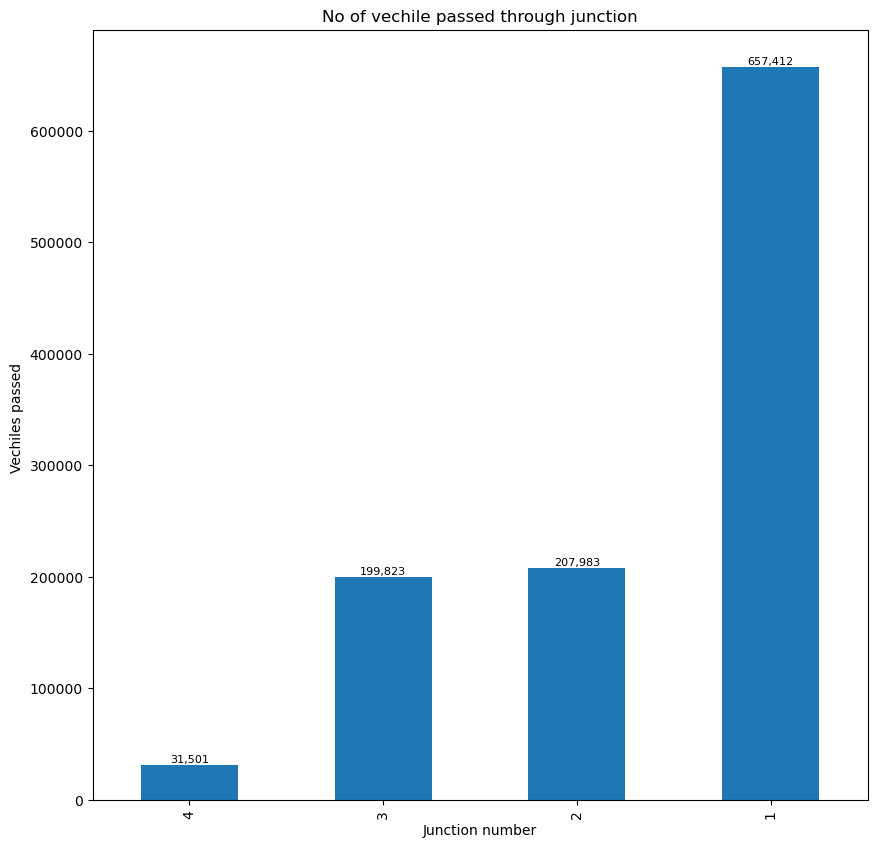

In [121]:
vechiles_by_junction.plot(
    kind='bar',figsize=(10,10)
)
plt.xlabel('Junction number')
plt.ylabel('Vechiles passed ')

for i, y in enumerate(vechiles_by_junction.values):
    plt.text(
        i,
        y,
        f'{y:,.0f}',
        ha='center',
        va='bottom',
        fontsize=8
    )
plt.title('No of vechile passed through junction')
plt.show()

In [21]:
df['Hours'] = df['DateTime'].dt.hour

In [24]:
df.head(30)

,DateTime,Junction,Vehicles,ID,Hours
0,2015-11-01 00:00:00,1,15,20151101001,0
1,2015-11-01 01:00:00,1,13,20151101011,1
2,2015-11-01 02:00:00,1,10,20151101021,2
3,2015-11-01 03:00:00,1,7,20151101031,3
4,2015-11-01 04:00:00,1,9,20151101041,4
5,2015-11-01 05:00:00,1,6,20151101051,5
6,2015-11-01 06:00:00,1,9,20151101061,6
7,2015-11-01 07:00:00,1,8,20151101071,7
8,2015-11-01 08:00:00,1,11,20151101081,8
9,2015-11-01 09:00:00,1,12,20151101091,9


In [71]:
# Vechiles through different junctions in different hours

hour_wise = df.groupby(['Hours','Junction'])['Vehicles'].sum().unstack().sort_index()
hour_wise

Junction,1,2,3,4
Hours,,,,
0,27809,9519,8618,1253
1,23807,8582,5993,1026
2,20616,7901,4898,876
3,17894,6973,4120,782
4,15598,6080,3635,698
5,14633,5604,3457,714
6,15857,5632,3792,744
7,17952,6119,4591,818
8,19903,6533,5507,945


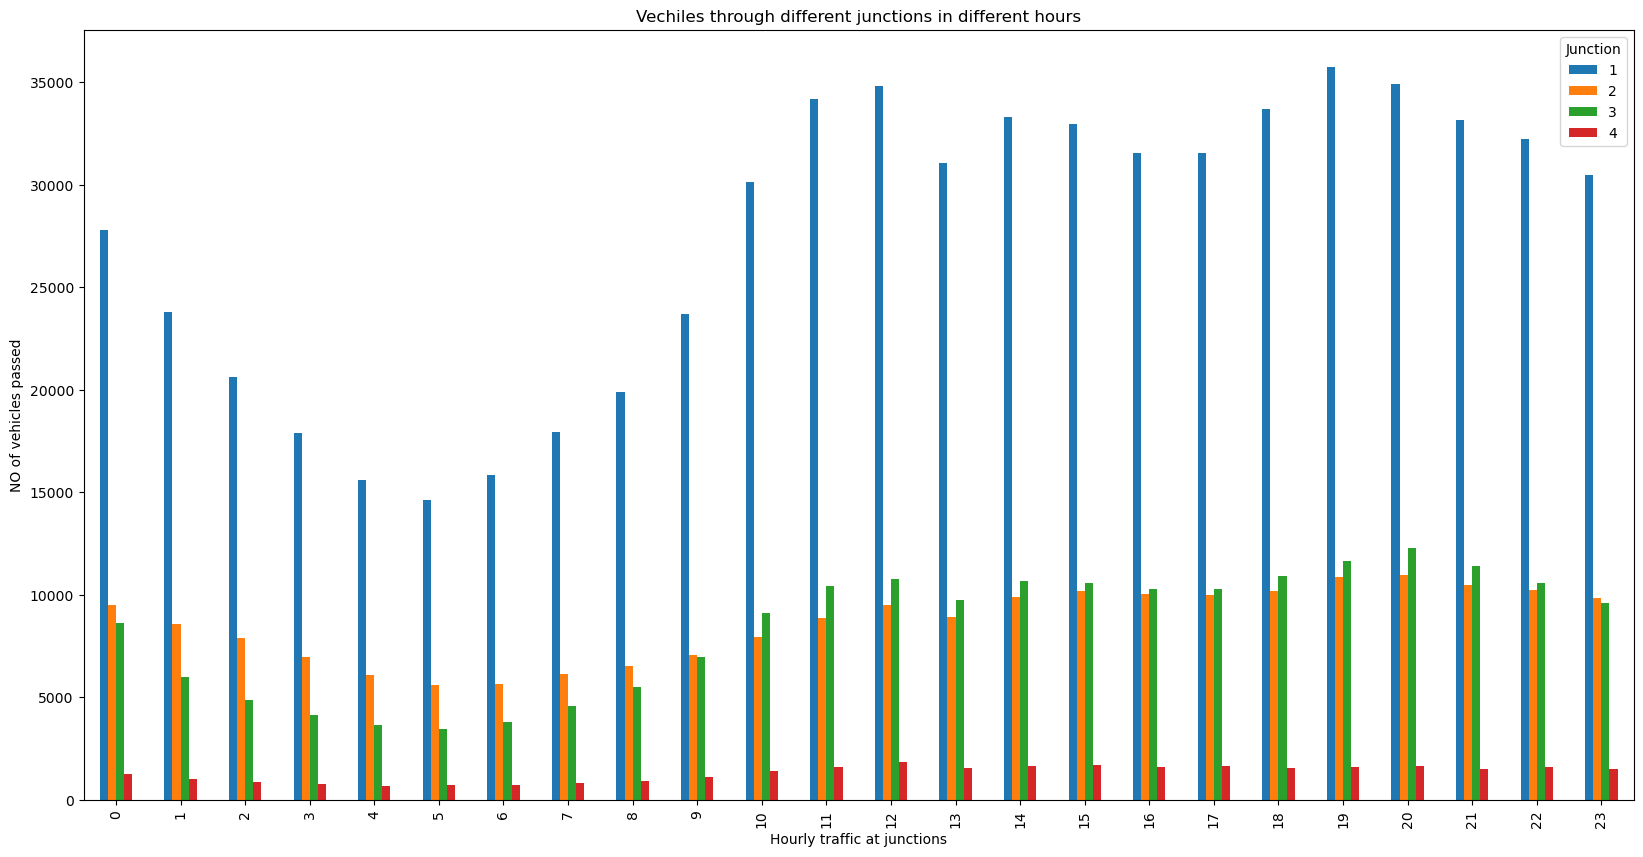

In [122]:
hour_wise.plot(kind = 'bar',figsize = (20,10))
plt.xlabel('Hourly traffic at junctions')
plt.ylabel('NO of vehicles passed')
plt.title('Vechiles through different junctions in different hours')
plt.show()

In [38]:
# Vechiles passage in different hours

traffic_volume = df.groupby('Hours')['Vehicles'].sum().sort_values()
traffic_volume

Hours
5     24408
4     26011
6     26025
7     29480
3     29769
8     32888
2     34291
9     38856
1     39408
0     47199
10    48581
13    51305
23    51399
17    53430
16    53482
22    54590
11    55128
15    55439
14    55544
18    56331
21    56547
12    56950
20    59799
19    59859
Name: Vehicles, dtype: int64

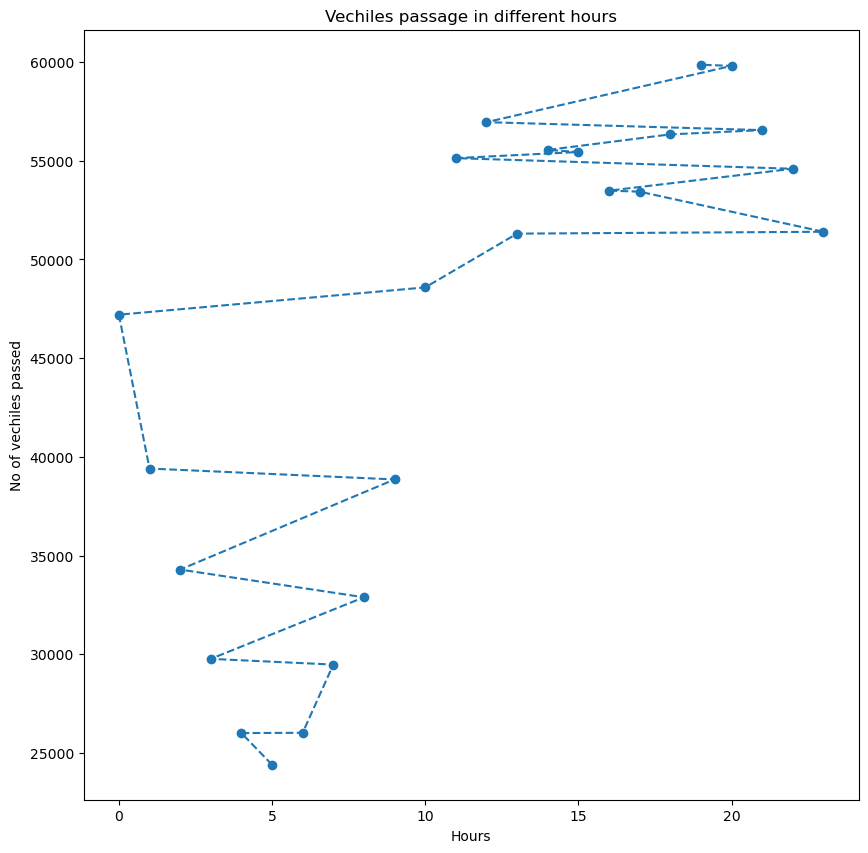

In [123]:
traffic_volume.plot(kind = 'line' , marker='o',linestyle='--',figsize=(10,10))
plt.xlabel('Hours')
plt.ylabel('No of vechiles passed')
plt.title('Vechiles passage in different hours')
plt.show()

In [48]:
df['Day'] = df['DateTime'].dt.day_name()

In [49]:
# Weekly passing of vechiles 

weekly_passing = df.groupby('Day')['Vehicles'].sum().sort_values(ascending = False)
weekly_passing

Day
Tuesday      174175
Thursday     173253
Wednesday    173231
Monday       168132
Friday       163949
Saturday     125955
Sunday       118024
Name: Vehicles, dtype: int64

C:\Users\shaik\AppData\Local\Temp\ipykernel_20788\2852062311.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekly_passing.index,y=weekly_passing.values,palette = 'Set1')


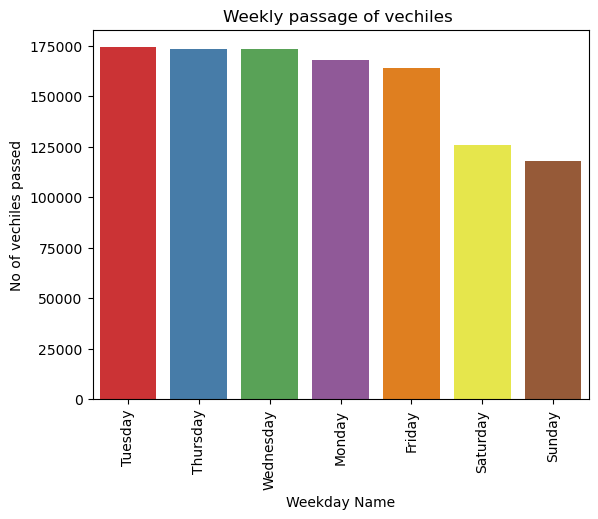

In [124]:
sns.barplot(x=weekly_passing.index,y=weekly_passing.values,palette = 'Set1')
plt.xlabel('Weekday Name')
plt.ylabel('No of vechiles passed')
plt.title('Weekly passage of vechiles ')
plt.xticks(rotation = 90)
plt.show()

In [56]:
df['Month'] = df['DateTime'].dt.month_name()

In [57]:
df.head()

,DateTime,Junction,Vehicles,ID,Hours,Day,Month
0,2015-11-01 00:00:00,1,15,20151101001,0,Sunday,November
1,2015-11-01 01:00:00,1,13,20151101011,1,Sunday,November
2,2015-11-01 02:00:00,1,10,20151101021,2,Sunday,November
3,2015-11-01 03:00:00,1,7,20151101031,3,Sunday,November
4,2015-11-01 04:00:00,1,9,20151101041,4,Sunday,November


In [59]:
# Month wise passing of vechiles

month_wise = df.groupby('Month')['Vehicles'].sum().sort_values(ascending = False)
month_wise

Month
June         131202
May          128291
April        123250
March        120166
February     109668
January      102740
December      84655
November      84388
October       59262
September     55393
August        48962
July          48742
Name: Vehicles, dtype: int64

C:\Users\shaik\AppData\Local\Temp\ipykernel_20788\905706417.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=month_wise.index,y=month_wise.values,palette ='cool')


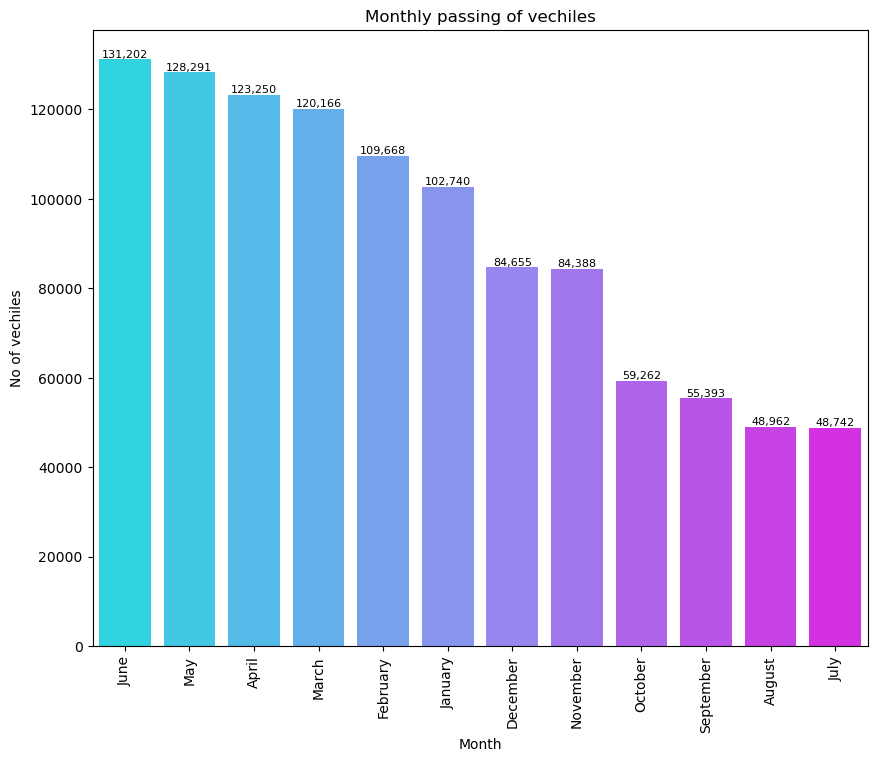

In [133]:
plt.figure(figsize = (10,8))
sns.barplot(x=month_wise.index,y=month_wise.values,palette ='cool')
plt.xlabel('Month')
plt.ylabel('No of vechiles')
plt.title('Monthly passing of vechiles')
plt.xticks(rotation = 90)

for i,j in enumerate(month_wise.values):
    plt.text(i,j,f'{j:,.0f}',
    ha='center',
    va='bottom',
    fontsize=8)
plt.show()

In [73]:
#peak hours of traffic

peak_hours = traffic_volume.sort_values(ascending = False).head(5)

In [74]:
peak_hours

Hours
19    59859
20    59799
12    56950
21    56547
18    56331
Name: Vehicles, dtype: int64

In [77]:
# off peak hours of traffic

off_hours = traffic_volume.sort_values().head(5)
off_hours

Hours
5    24408
4    26011
6    26025
7    29480
3    29769
Name: Vehicles, dtype: int64

<Axes: title={'center': 'Vehicles'}, xlabel='Junction'>

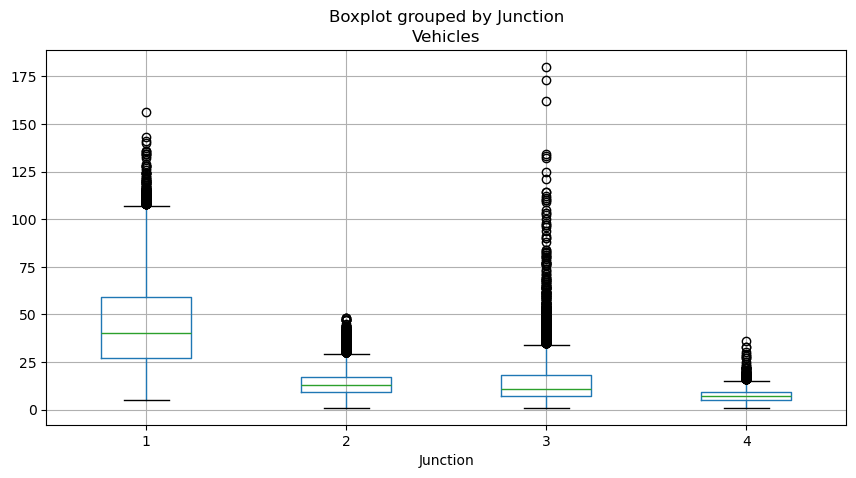

In [79]:
#finding junctions with abnormal traffic

df.boxplot(column='Vehicles', by='Junction', figsize=(10,5))

In [80]:
df[['Vehicles','Hours','Junction']].corr()


,Vehicles,Hours,Junction
Vehicles,1.000000,2.199377e-01,-6.137872e-01
Hours,0.219938,1.000000e+00,-2.133601e-15
Junction,-0.613787,-2.133601e-15,1.000000e+00


In [81]:
daily_trend = df.groupby(df['DateTime'].dt.date)['Vehicles'].sum()
daily_trend

DateTime
2015-11-01     596
2015-11-02     909
2015-11-03     911
2015-11-04     818
2015-11-05     770
              ... 
2017-06-26    2956
2017-06-27    3709
2017-06-28    3579
2017-06-29    3575
2017-06-30    3363
Name: Vehicles, Length: 608, dtype: int64

In [98]:
# hour vs day traffic intensity

daily_passing = df.groupby(['Hours','Day'])['Vehicles'].sum().unstack()

In [100]:
day_order = [
    'Monday','Tuesday','Wednesday',
    'Thursday','Friday','Saturday','Sunday'
]

daily_passing = daily_passing[day_order]
daily_passing

Day,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Hours,,,,,,,
0,5803,7205,7335,7294,7376,6603,5583
1,4730,6161,6241,6118,6161,5454,4543
2,4149,5448,5462,5353,5292,4696,3891
3,3778,4706,4728,4630,4523,3951,3453
4,3487,4073,4013,4034,3906,3403,3095
5,3390,3791,3803,3813,3696,3074,2841
6,3730,4151,4093,4082,3910,3107,2952
7,4385,4724,4630,4610,4506,3371,3254
8,4886,5221,5166,5083,4980,3823,3729


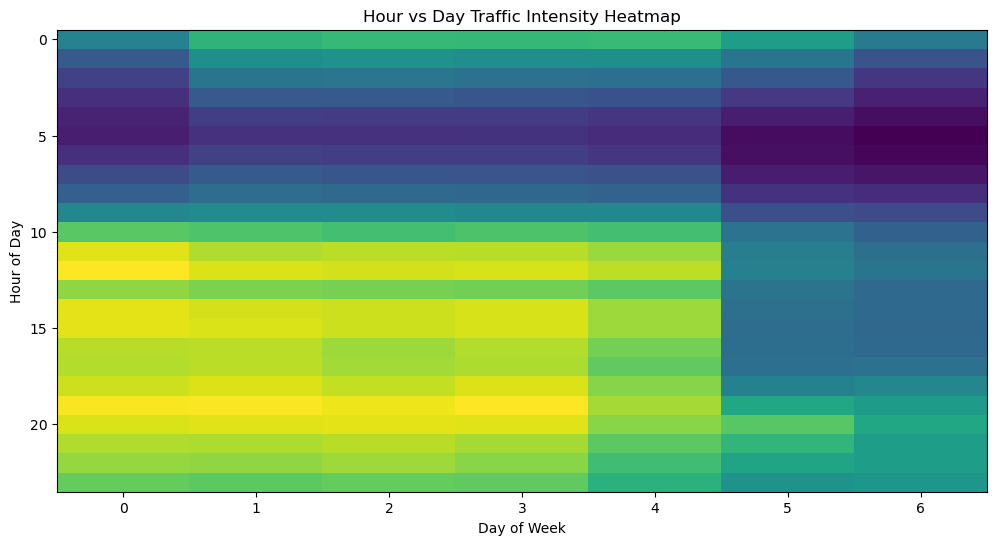

In [145]:
plt.figure(figsize=(12,6))
plt.imshow(daily_passing, aspect='auto')
plt.xlabel('Day of Week')
plt.ylabel('Hour of Day')
plt.title('Hour vs Day Traffic Intensity Heatmap')

plt.show()


In [110]:
#average traffic per hour 

avg_traffic = df.groupby('Hours')['Vehicles'].mean()
avg_traffic

Hours
0     23.540648
1     19.654863
2     17.102743
3     14.847382
4     12.973067
5     12.173566
6     12.980050
7     14.703242
8     16.402993
9     19.379551
10    24.229925
11    27.495262
12    28.403990
13    25.588529
14    27.702743
15    27.650374
16    26.674314
17    26.648379
18    28.095262
19    29.854863
20    29.824938
21    28.202993
22    27.226933
23    25.635411
Name: Vehicles, dtype: float64

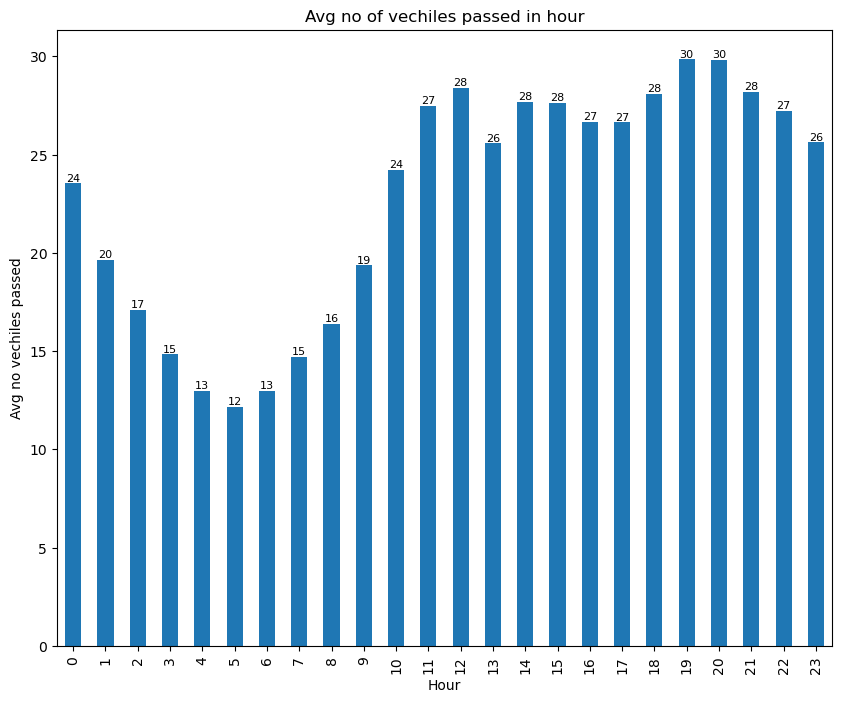

In [137]:
avg_traffic.plot(kind='bar',figsize=(10,8))
plt.xlabel('Hour')
plt.ylabel('Avg no vechiles passed')
plt.title('Avg no of vechiles passed in hour')

for i,j in enumerate(avg_traffic.values):
    plt.text(i,j,f'{j:.0f}',
             ha='center',
             va='bottom',
             fontsize = 8)
plt.show()